In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasgui import show
from math import pi

In [2]:
df_cleaned = pd.read_csv('data/arabica_data_cleaned.csv')
df2_cleaned = pd.read_csv('data/robusta_data_cleaned.csv')

df_raw = pd.read_csv('data/arabica_ratings_raw.csv')
df2_raw = pd.read_csv('data/robusta_ratings_raw.csv')

In [3]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1165 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

In [65]:
df = df_cleaned.drop(['Unnamed: 0','Owner', 'Farm.Name', 'Mill', 'ICO.Number', 'Company', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
                    'Grading.Date', 'Owner.1', 'Certification.Body', 'Certification.Address', 'Certification.Contact',
                     'unit_of_measurement'], axis=1)

In [53]:
# drop row with '0' cupping points
df.drop(index=1310, axis=0, inplace=True)

In [7]:
def one_dim_scatterplot(data, ax, jitter=0.2, **options):
    if jitter:
        jitter = np.random.uniform(-jitter, jitter, size=data.shape)
    else:
        jitter = np.repeat(0.0, len(data))
    ax.scatter(data, jitter, **options)
    ax.yaxis.set_ticklabels([])
    ax.set_ylim([-1, 1])

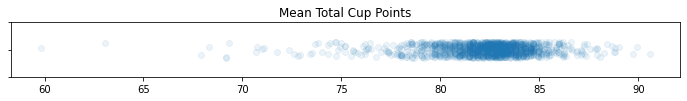

In [17]:
fig, ax = plt.subplots(1, figsize=(12, 1))
one_dim_scatterplot(df['Total.Cup.Points'], ax, jitter=0.3, alpha=0.08)
ax.set_title('Mean Total Cup Points');

In [64]:
# mean total cup points grouped by country in descending order
df[['Country.of.Origin', 'Total.Cup.Points']].groupby('Country.of.Origin').mean('Total.Cup.Points')\
.sort_values('Total.Cup.Points', ascending=False)

,Total.Cup.Points
Country.of.Origin,
United States,85.978750
Papua New Guinea,85.750000
Ethiopia,85.484091
Japan,84.670000
Kenya,84.309600
Uganda,84.051923
Ecuador,83.830000
Panama,83.707500
Colombia,83.106557


In [60]:
# number of coffees sampled grouped by country
df.groupby('Country.of.Origin').count()[['Total.Cup.Points']].sort_values('Total.Cup.Points', ascending=False).reset_index()

,Country.of.Origin,Total.Cup.Points
0,Mexico,236
1,Colombia,183
2,Guatemala,181
3,Brazil,132
4,Taiwan,75
5,United States (Hawaii),73
6,Honduras,52
7,Costa Rica,51
8,Ethiopia,44
9,"Tanzania, United Republic Of",40


In [54]:
# creating mask to filter countries with only coffee samples > 40 (top 9)
coffee_by_region = df.groupby('Country.of.Origin').count()[['Total.Cup.Points']].sort_values('Total.Cup.Points', ascending=False).reset_index()
coffee_by_region = coffee_by_region[coffee_by_region['Total.Cup.Points'] > 40]
coffee_by_region

,Country.of.Origin,Total.Cup.Points
0,Mexico,236
1,Colombia,183
2,Guatemala,181
3,Brazil,132
4,Taiwan,75
5,United States (Hawaii),73
6,Honduras,52
7,Costa Rica,51
8,Ethiopia,44


In [195]:
top_9['Country.of.Origin'].unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'United States (Hawaii)',
       'Costa Rica', 'Mexico', 'Honduras', 'Taiwan', 'Colombia'],
      dtype=object)

In [55]:
# initialize new df using mask, top 9 countries of coffees sampled
top_9 = df[df['Country.of.Origin'].isin(list(coffee_by_region['Country.of.Origin'].values))]
top_9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 0 to 1309
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1027 non-null   int64  
 1   Species               1027 non-null   object 
 2   Country.of.Origin     1027 non-null   object 
 3   Lot.Number            197 non-null    object 
 4   Altitude              844 non-null    object 
 5   Region                993 non-null    object 
 6   Producer              836 non-null    object 
 7   Harvest.Year          993 non-null    object 
 8   Variety               883 non-null    object 
 9   Processing.Method     910 non-null    object 
 10  Aroma                 1027 non-null   float64
 11  Flavor                1027 non-null   float64
 12  Aftertaste            1027 non-null   float64
 13  Acidity               1027 non-null   float64
 14  Body                  1027 non-null   float64
 15  Balance              

In [191]:
# df of cupping score results of top 9 countries
scored = top_9[['Country.of.Origin', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points']]\
                .groupby('Country.of.Origin').mean().sort_values('Total.Cup.Points', ascending=False)
scored

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points
Country.of.Origin,,,,,,,,,,,
Ethiopia,7.896364,8.009091,7.893864,8.043636,7.924091,7.972273,9.878409,9.954318,9.863409,8.048636,85.484091
Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.934426,9.945355,9.952678,7.620546,83.106557
Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.856275,9.869216,9.908431,7.663529,82.789020
Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.884924,9.853485,9.949394,7.562955,82.405909
Taiwan,7.533600,7.463600,7.395467,7.415467,7.450000,7.426000,9.893067,9.982133,9.964400,7.476667,82.001333
Guatemala,7.544862,7.489006,7.266851,7.596409,7.475746,7.469890,9.852486,9.889337,9.870884,7.391105,81.846575
United States (Hawaii),7.572466,7.576438,7.502740,7.615479,7.625753,7.644110,9.478904,9.561507,9.652466,7.588767,81.820411
Mexico,7.457585,7.379025,7.228051,7.428347,7.380466,7.328686,9.744068,9.658136,9.971780,7.314703,80.890085
Honduras,7.432692,7.373269,7.197308,7.372692,7.378462,7.301731,9.833269,9.820577,9.846154,7.327885,80.883654


In [166]:
values = scored[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Sweetness', 'Cupper.Points']].loc['Ethiopia'].tolist()
values

[7.8963636363636365,
 8.00909090909091,
 7.893863636363637,
 8.043636363636363,
 7.924090909090908,
 7.972272727272728,
 9.878409090909091,
 9.95431818181818,
 9.86340909090909,
 8.048636363636364]

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of ticklabels (10).

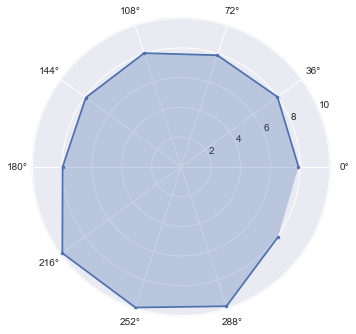

In [183]:
categories = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Sweetness', 'Cupper.Points']
N = len(categories)

values = scored[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Sweetness', 'Cupper.Points']].loc['Ethiopia'].tolist()
values += values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.polar(angles, values, marker='.')
plt.fill(angles, values, alpha=0.3)

plt.xticks(angles[:-1], categories)
plt.yticks([2,4,6,8], color='grey', size=10)

plt.title('Ethiopia', size=16);

/Users/joshchow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning:

Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.



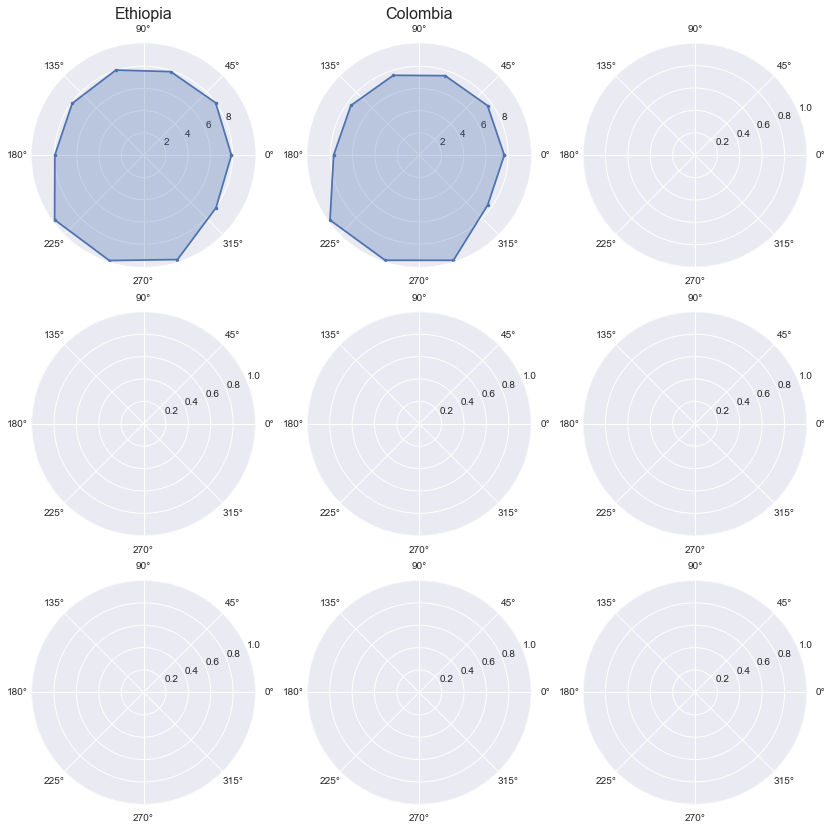

In [163]:
fig, ax = plt.subplots(3,3,figsize=(14,14),subplot_kw=dict(projection='polar'))
plt.style.use('seaborn')

# graph constants
# x axis
categories = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Sweetness', 'Cupper.Points']
N = len(categories)
# creating connecting 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# 'ethiopia plot'
values = scored[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Sweetness', 'Cupper.Points']].loc['Ethiopia'].tolist()
values += values[:1]

ax[0,0].plot(angles, values, marker='.')
ax[0,0].fill(angles, values, alpha=0.3)
ax[0,0].set_xticks(angles[:-1], categories)
ax[0,0].set_yticks([2,4,6,8])
ax[0,0].set_title('Ethiopia', size=16);

# columbia plot
values = scored[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Sweetness', 'Cupper.Points']].loc['Colombia'].tolist()
values += values[:1]

ax[0,1].plot(angles, values, marker='.')
ax[0,1].fill(angles, values, alpha=0.3)
ax[0,1].set_xtick(angles[:-1], categories)
ax[0,1].set_yticks([2,4,6,8])
ax[0,1].set_title('Colombia', size=16);

In [ ]:
# function to plot radar charts of coffee cupping scores
def plot_scored(region, color):
    categories = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Sweetness', 'Cupper.Points']
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    for i, axes in enumerate(axes.flat):
    for i in scored['Country.of.Origin'].tolist():
        values = []
            for j in scored[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Sweetness', 'Cupper.Points']].loc['{}'.format(i)].tolist():
                values.append(i)
        ax.polar(angles, values, marker='.')
        ax.set_title('{}'.format(i))

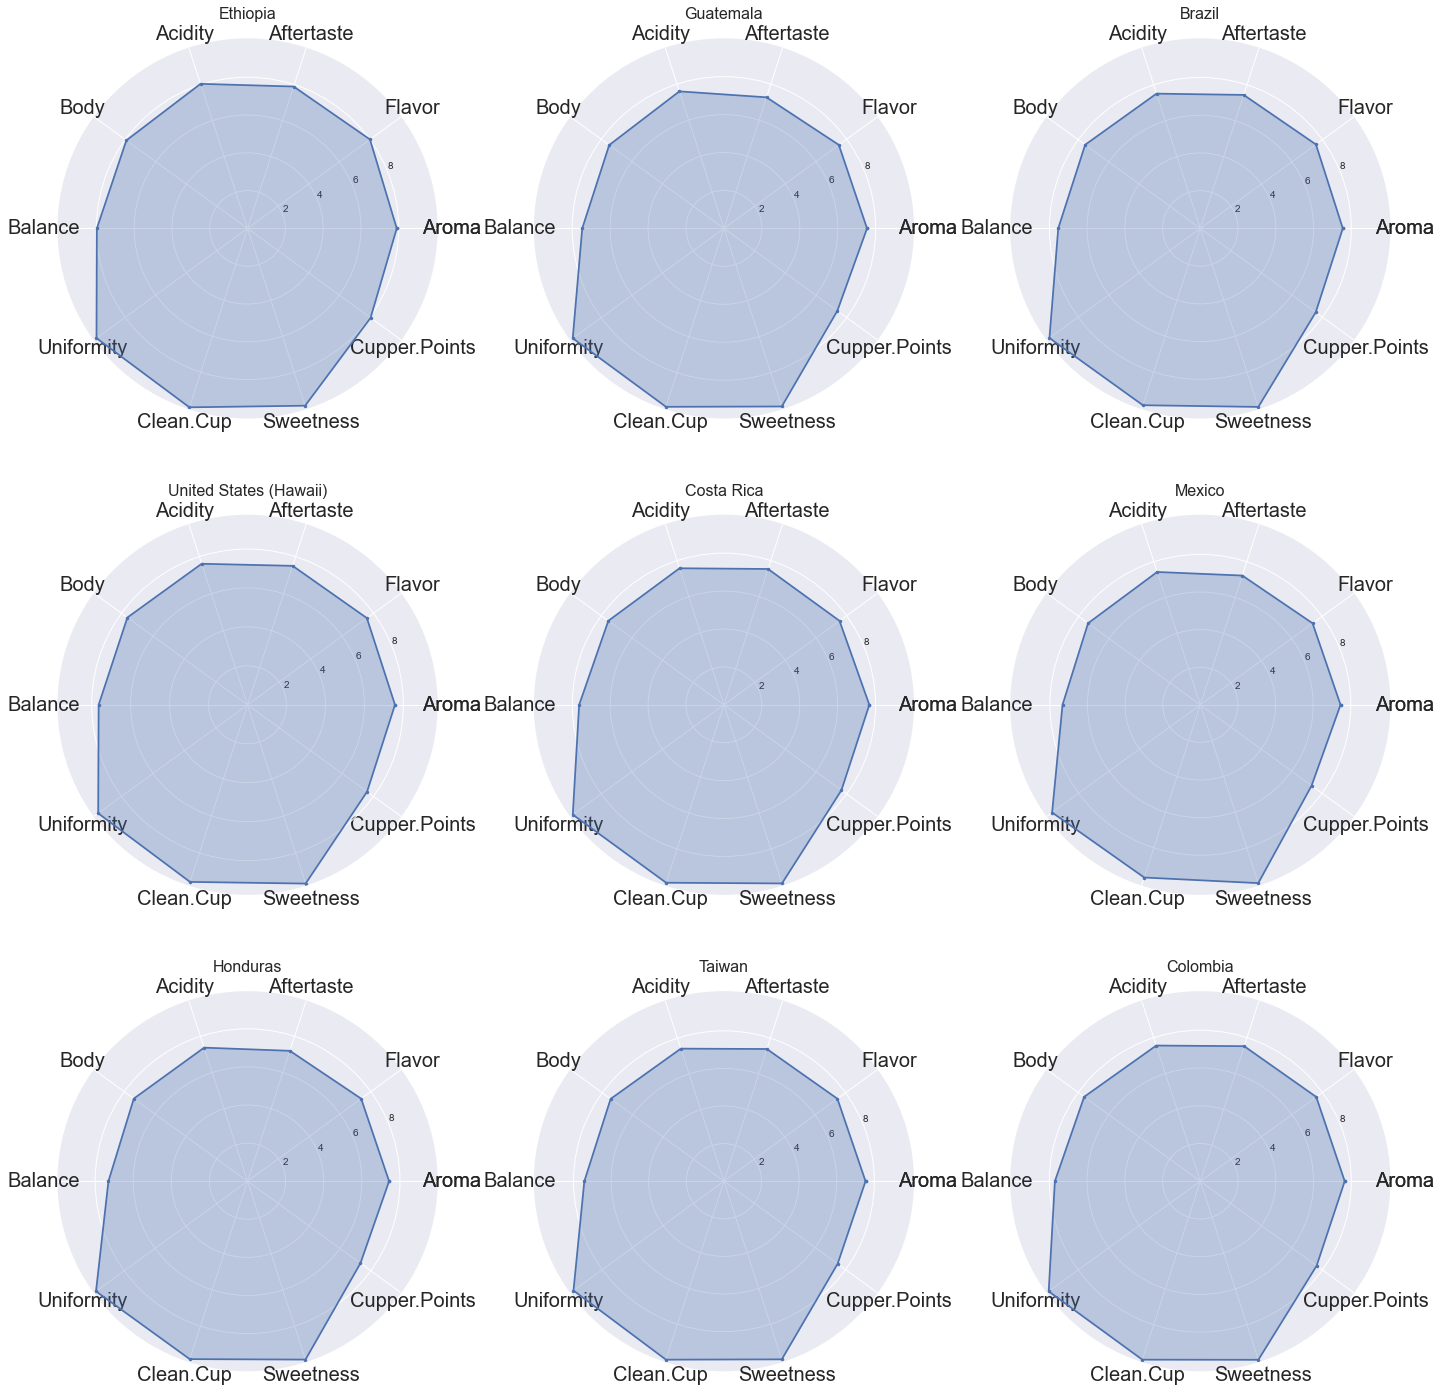

In [208]:
def get_values(country):
    values = scored[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Sweetness', 'Cupper.Points']].loc[country].tolist()
    values += values[:1]
    return values

def helper(ax, country):
    categories = ['', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
                'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Aroma']
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
#     for i in scored['Country.of.Origin'].tolist():
    ax.plot(angles, get_values(country), marker='.', )
    ax.fill(angles, get_values(country), alpha=0.3)
    ax.set_xticks(angles)
    ax.set_xticklabels(categories, fontsize=20)
    ax.set_yticks([2,4,6,8])
    ax.set_title(country, size=16);
    
    
# and use it like so
# fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
# helper(ax, 'Ethiopia')
# plt.show() 


# just so there is no code output showing after the cell
# and if you have multiple series of values, turn it into a loop
# break it down into a simple problem. write functions to do simple things, 
# and then put the simple pieces together to do something more complicated
# or make multiple plots in one figure
# array where rows are one set of values
# arr_values = [values1, values2, etc...]
countries = ['Ethiopia', 'Guatemala', 'Brazil', 'United States (Hawaii)',
       'Costa Rica', 'Mexico', 'Honduras', 'Taiwan', 'Colombia']
fig, axs = plt.subplots(3, 3, figsize=(20,20), subplot_kw=dict(projection='polar')) # 4 rows and 5 columns of subplots
for (ax, country) in zip(axs.flat, countries):
    helper(ax, country);
#     # will fill up your subplots one by one
plt.tight_layout()

In [194]:
df['Country.of.Origin'].unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', nan, 'India'], dtype=object)